TP Integrador - Redes Neuronales.

Clasificación para determinar la mejor siembra segun el suelo y el ambiente


data set: https://www.kaggle.com/datasets/varshitanalluri/crop-recommendation-dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns

In [3]:
csv = pd.read_csv('mushroom.csv')
csv.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [4]:
#csv.fillna(csv.median(), inplace=True)
csv.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [5]:
csv_data = csv.drop('class', axis=1)
crop = csv['class']
csv_stats = csv_data.describe().T
csv_data_n = (csv_data - csv_stats['mean']) / csv_stats['std']
csv_n = pd.concat([csv_data_n, crop], axis=1)
csv_n.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,5.403500e+04,5.403500e+04,5.403500e+04,5.403500e+04,5.403500e+04,5.403500e+04,5.403500e+04,5.403500e+04,54035.000000
mean,7.574213e-17,5.891055e-17,1.683159e-17,-5.891055e-17,2.188106e-16,-7.784608e-17,-4.207896e-17,2.735133e-17,0.549181
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.497580
min,-1.576223e+00,-1.851564e+00,-9.610715e-01,-2.290281e+00,-1.165470e+00,-1.343997e+00,-2.580583e+00,-3.026211e+00,0.000000
25%,-7.731863e-01,-9.258550e-01,-9.610715e-01,-7.279110e-01,-7.498255e-01,-8.056728e-01,-7.412645e-01,-2.084882e-01,0.000000
50%,-1.174190e-01,4.627091e-01,-5.124037e-01,2.095111e-01,-2.547200e-01,-1.637751e-01,7.915009e-01,-2.934747e-02,1.000000
75%,5.939218e-01,9.255638e-01,8.335995e-01,8.344592e-01,4.543199e-01,6.034333e-01,7.915009e-01,-2.934747e-02,1.000000
max,3.678251e+00,9.255638e-01,1.730935e+00,1.146933e+00,4.725589e+00,3.219614e+00,1.098054e+00,2.788376e+00,1.000000


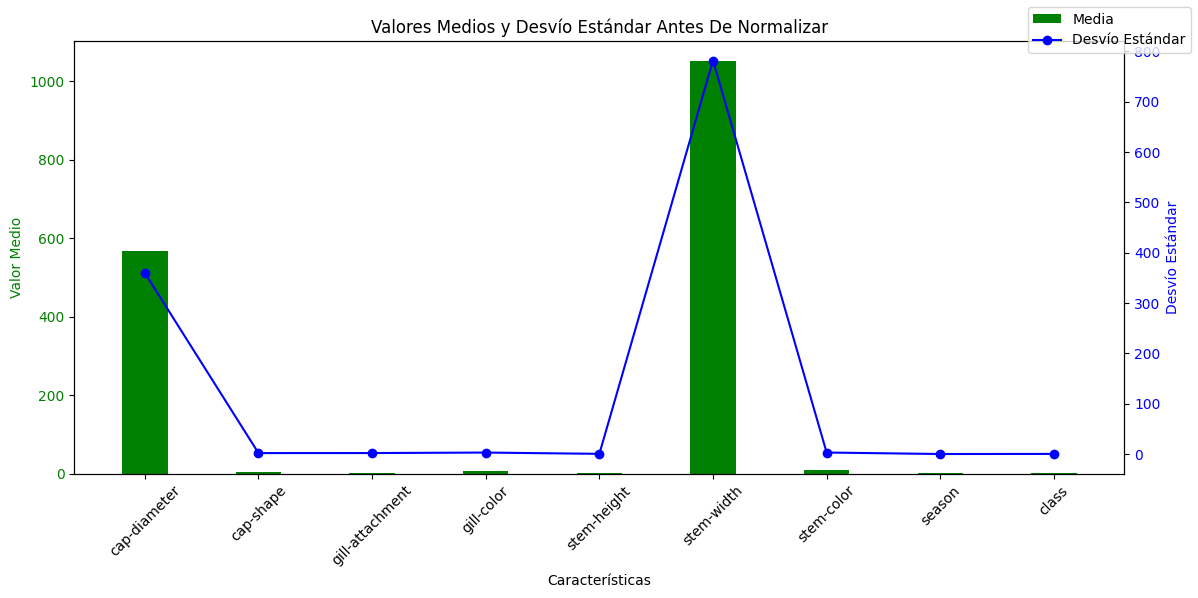

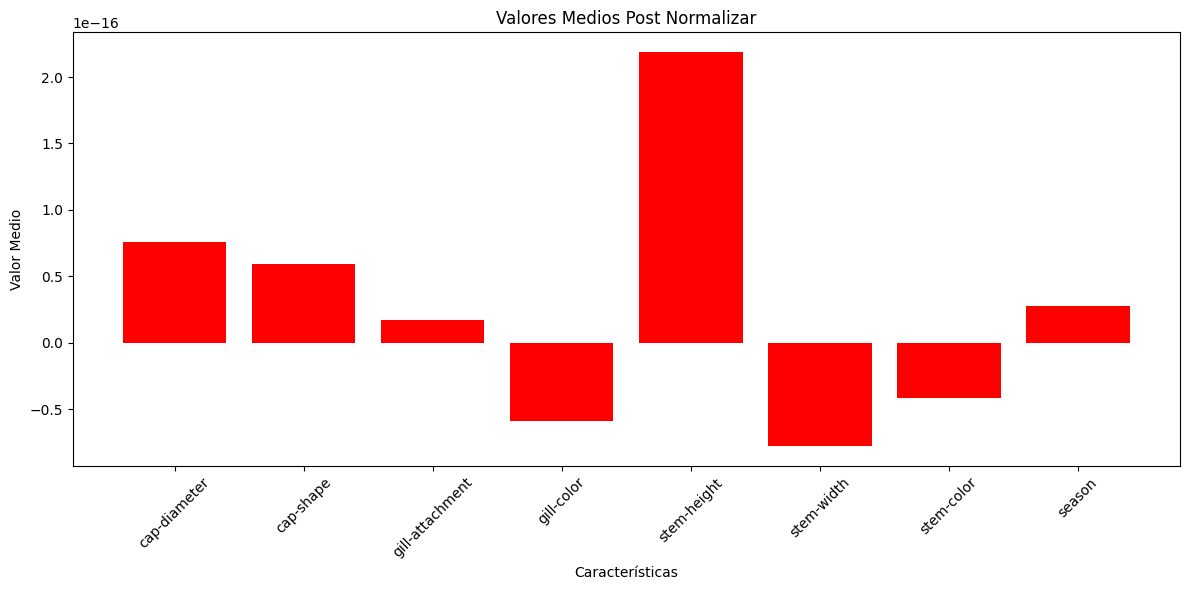

In [6]:
fig, ax1 = plt.subplots(figsize=(12, 6))

bar_width = 0.4
x = np.arange(len(csv.columns))

ax1.bar(x, csv.describe().loc['mean'], bar_width, color='green', label='Media')
ax1.set_xlabel('Características')
ax1.set_ylabel('Valor Medio', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xticks(x)
ax1.set_xticklabels(csv.columns, rotation=45)
ax1.set_title('Valores Medios y Desvío Estándar Antes De Normalizar')

ax2 = ax1.twinx()
ax2.plot(x, csv.describe().loc['std'], color='blue', marker='o', label='Desvío Estándar')
ax2.set_ylabel('Desvío Estándar', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()
fig.legend(loc='upper right')

plt.show()

plt.figure(figsize=(12, 6))
plt.bar(csv_data_n.columns, csv_data_n.describe().loc['mean'], color='red')
plt.title('Valores Medios Post Normalizar')
plt.xlabel('Características')
plt.ylabel('Valor Medio')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'cap-diameter'}>,
        <Axes: title={'center': 'cap-shape'}>,
        <Axes: title={'center': 'gill-attachment'}>],
       [<Axes: title={'center': 'gill-color'}>,
        <Axes: title={'center': 'stem-height'}>,
        <Axes: title={'center': 'stem-width'}>],
       [<Axes: title={'center': 'stem-color'}>,
        <Axes: title={'center': 'season'}>, <Axes: >]], dtype=object)

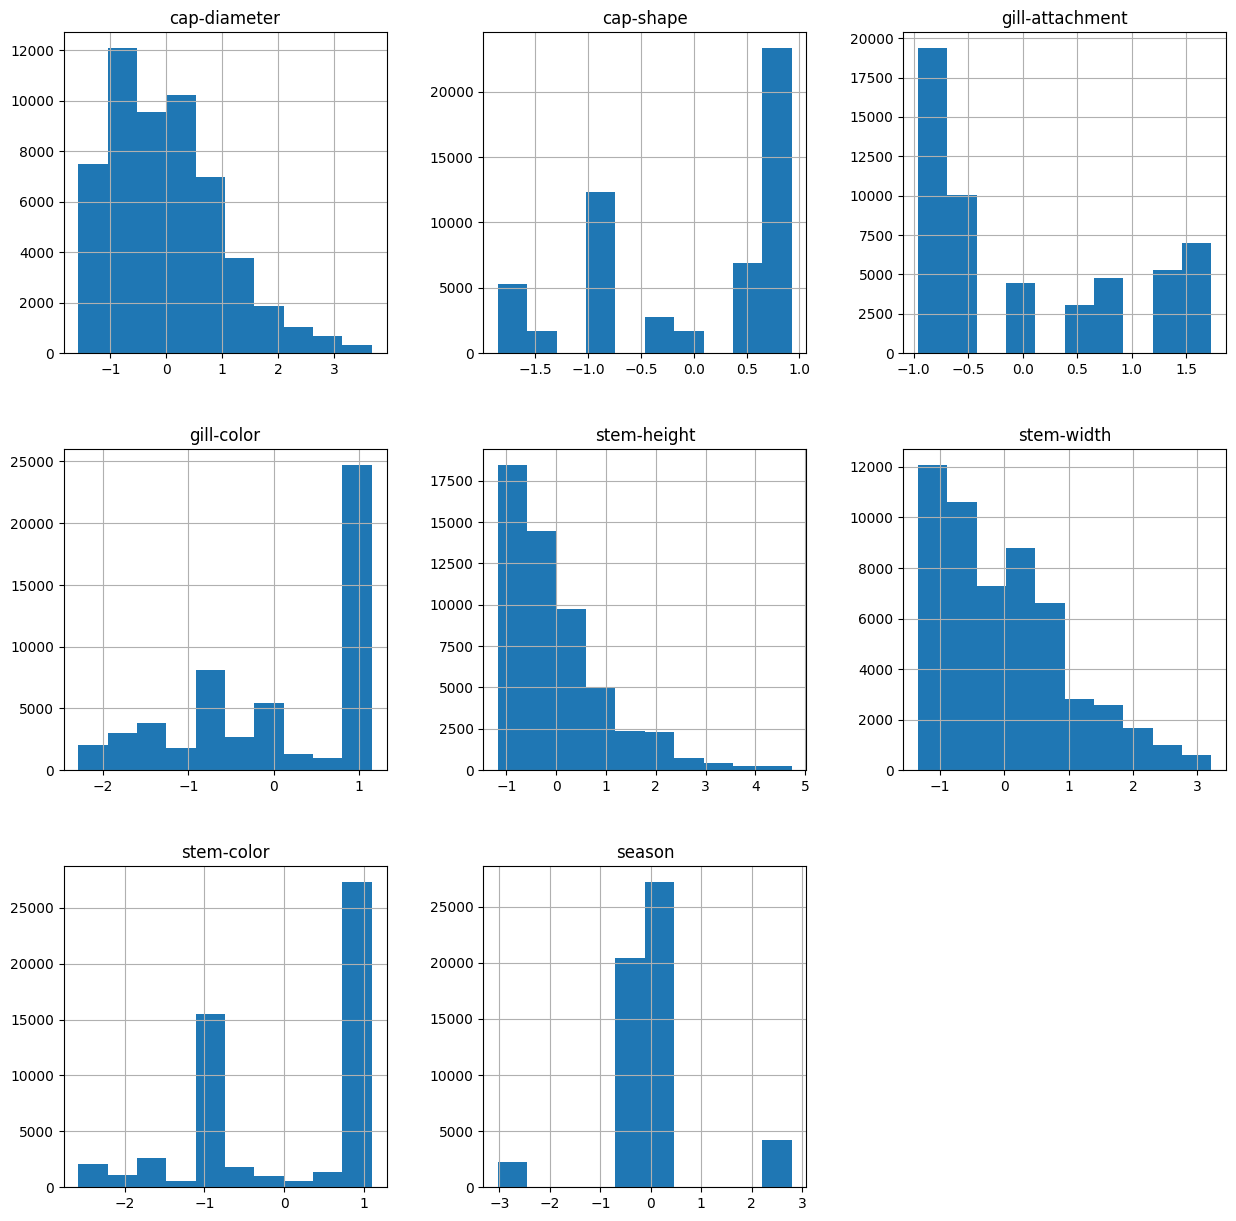

In [7]:
csv_data_n.corr()
csv_data_n.hist(figsize=(15,15))

<Axes: >

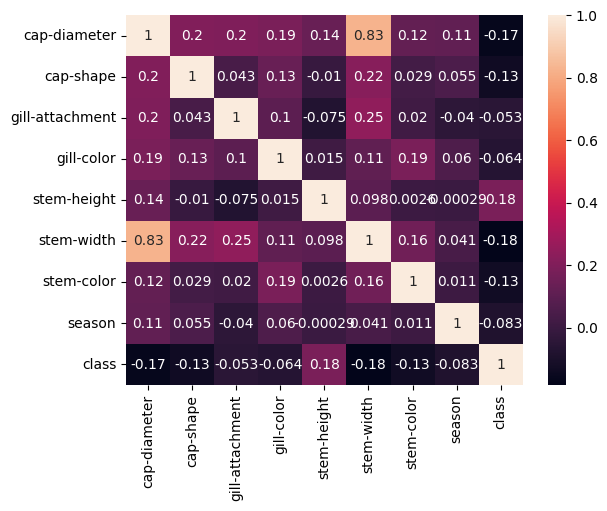

In [8]:
sns.heatmap(csv.corr() ,annot= True)

In [18]:
X_drop = csv_n.drop(['class'],axis=1)

X = X_drop.values
Y = csv_n['class'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3, random_state=42)

In [ ]:
input_size = X_train.shape[1] # Número de características de entrada
hidden1_size = 40  # Tamaño de la primera capa oculta
hidden2_size = 30 # Tamaño de la segunda capa oculta
output_size = 1  # Tamaño de la capa de salida

# Pesos
w_hidden1 = np.random.rand(hidden1_size, input_size)
#w_hidden2 = np.random.rand(hidden2_size, hidden1_size)
w_output = np.random.rand(output_size, hidden1_size)
# Sesgos
b_hidden1 = np.random.rand(hidden1_size, 1)
#b_hidden2 = np.random.rand(hidden2_size, 1)
b_output = np.random.rand(output_size, 1)

# Funciones de activación
relu = lambda x: np.maximum(x, 0)
#softmax = lambda x: np.exp(x) / np.sum(np.exp(x), axis=0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Derivadas de las funciones de activación
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

# Función que ejecuta la propagación hacia adelante de la red neuronal
def forward_prop(X):
    Z1 = w_hidden1 @ X + b_hidden1
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = relu(Z2)
    #Z3 = w_output @ A2 + b_output
    #A3 = logistic(Z3) * 21 
    return Z1, A1, Z2, A2#, Z3, A3

# Cálculo de precisión
test_predictions = forward_prop(X_test.transpose())[-1]
test_comparisons = np.equal((test_predictions >= .5).astype(int), Y_test)
accuracy = np.mean(test_comparisons.astype(int))
print("Precisión:", accuracy)

Precisión: 0.5194004071309605


In [25]:
L = 0.001  # La tasa de aprendizaje

# Devuelve pendientes para pesos y sesgos
# usando la regla de la cadena

def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# Ejecutar descenso de gradiente
n = X_train.shape[0]
print(n)
for i in range(50000):
    # seleccionar aleatoriamente un conjunto de datos de entrenamiento
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # pasar datos seleccionados aleatoriamente a través de la red neuronal
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # distribuir error a través de la retropropagación
    # y devolver pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # actualizar pesos y sesgos
    w_hidden1 -= L * dW1
    b_hidden1 -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2


    # Cálculo de precisión
test_predictions = forward_prop(X_test.transpose())[3]
test_predictions = (test_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios
accuracy = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con los valores reales

print("ACCURACY: ", accuracy)
print(f'Accuracy: {accuracy * 100:.2f}%')

37824
ACCURACY:  0.45573992967737953
Accuracy: 45.57%


In [26]:
model = MLPClassifier(
	                solver='sgd', 
                    hidden_layer_sizes=(20, 20),
                    activation='relu',
                    max_iter=100_000,
                    learning_rate_init=.0001,
                    verbose=True,
                    random_state=42,
                    tol=1e-6)

model.fit(X_train, Y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular la precisión del modelo

print("Puntaje del conjunto de entrenamiento: %f" % model.score(X_train, Y_train))
print("Puntaje del conjunto de prueba: %f" % model.score(X_test, Y_test))

Iteration 1, loss = 0.86093963
Iteration 2, loss = 0.79952568
Iteration 3, loss = 0.75841962
Iteration 4, loss = 0.73046425
Iteration 5, loss = 0.71114460
Iteration 6, loss = 0.69756792
Iteration 7, loss = 0.68791407
Iteration 8, loss = 0.68089683
Iteration 9, loss = 0.67566379
Iteration 10, loss = 0.67159334
Iteration 11, loss = 0.66830836
Iteration 12, loss = 0.66558972
Iteration 13, loss = 0.66322675
Iteration 14, loss = 0.66113871
Iteration 15, loss = 0.65924126
Iteration 16, loss = 0.65748280
Iteration 17, loss = 0.65584203
Iteration 18, loss = 0.65429665
Iteration 19, loss = 0.65283261
Iteration 20, loss = 0.65143220
Iteration 21, loss = 0.65009021
Iteration 22, loss = 0.64879756
Iteration 23, loss = 0.64755703
Iteration 24, loss = 0.64636497
Iteration 25, loss = 0.64521962
Iteration 26, loss = 0.64410621
Iteration 27, loss = 0.64303504
Iteration 28, loss = 0.64199222
Iteration 29, loss = 0.64098115
Iteration 30, loss = 0.63999167
Iteration 31, loss = 0.63902893
Iteration 32, los